# Исследовательский анализ данных

# Определение возраста покупателей

## Описание проекта

Сетевой супермаркет «Хлеб-Соль» внедряет систему компьютерного зрения для обработки фотографий покупателей. Фотофиксация в прикассовой зоне поможет определять возраст клиентов, чтобы:
-	Анализировать покупки и предлагать товары, которые могут заинтересовать покупателей этой возрастной группы;
-	Контролировать добросовестность кассиров при продаже алкоголя.

Задача: построить модель, которая по фотографии определит приблизительный возраст человека. В распоряжении набор фотографий людей с указанием возраста.


In [ ]:
import pandas as pd
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
labels = pd.read_csv('/datasets/faces/labels.csv')
labels.head()

,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17


In [ ]:
labels.shape

(7591, 2)

In [ ]:
labels.isna().sum()

file_name    0
real_age     0
dtype: int64

In [ ]:
labels.describe()

,real_age
count,7591.000000
mean,31.201159
std,17.145060
min,1.000000
25%,20.000000
50%,29.000000
75%,41.000000
max,100.000000


<AxesSubplot:xlabel='real_age', ylabel='Density'>

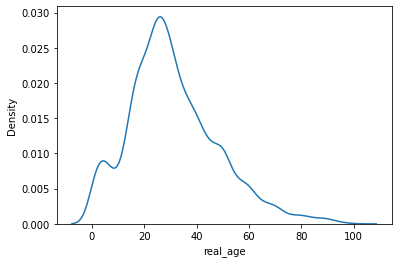

In [ ]:
sns.kdeplot(data=labels, x='real_age')

<AxesSubplot:>

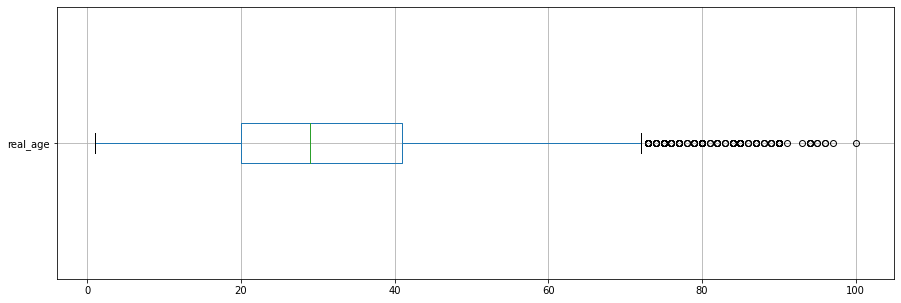

In [ ]:
labels.boxplot(vert=False, figsize=(15,5))

In [ ]:
train_datagen = ImageDataGenerator(
        validation_split=0.25,
        horizontal_flip=True,
        width_shift_range=0.2, height_shift_range=0.2,
        rescale=1/255.) # horizontal_flip=True,  vertical_flip=True, width_shift_range=0.2, height_shift_range=0.2, rotation_range=90


In [ ]:
train_datagen_flow = train_datagen.flow_from_dataframe(
    dataframe=labels,
    directory='/datasets/faces/final_files/',
    x_col='file_name',
    y_col='real_age',
    target_size=(224, 224),
    batch_size=32,
    class_mode='raw',
    seed=12345)

features, target = next(train_datagen_flow)

Found 7591 validated image filenames.


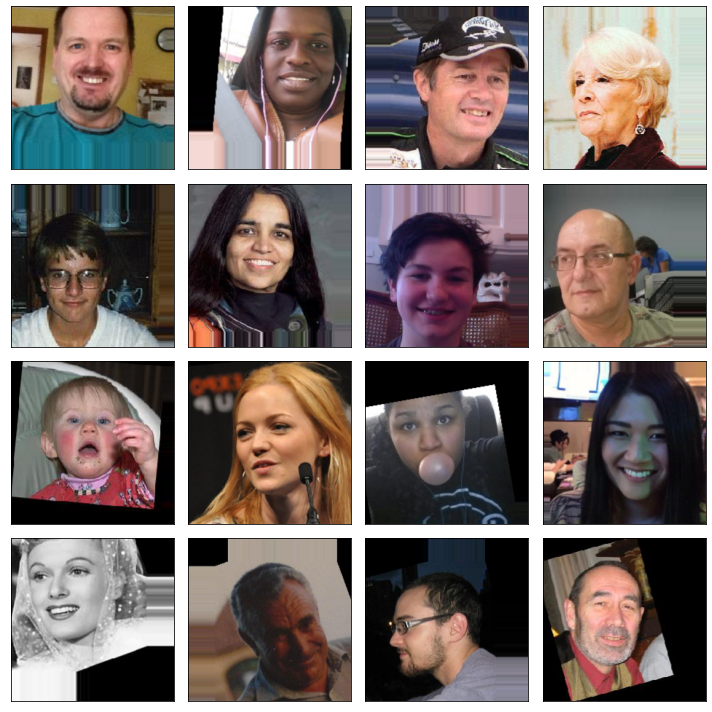

In [ ]:
fig = plt.figure(figsize=(10,10))
for i in range(16):
    fig.add_subplot(4, 4, i+1)
    plt.imshow(features[i])
	# для компактности удаляем оси и прижимаем изображения друг к другу
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()

## Вывод

В наборе 7591 строк.
- Первый столбец содержит название файла фотографии, второй возраст человека.

Визуальный анализ:
- В наборе присутствуют цветные и черно-белые фото.
- Фото сделаны с разных ракурсов.

Статистический анализ:
- Средний возраст выборки 31 год.
- Интервал возрастов от 1-100,
- Основная часть находится в диапозоне 20 - 40.
- Распределение близко к нормальному.
- "Ящик с усами" показывает, что после 72 - данные нетипичны.

Пропусков в данных не обнаружено.

Для формирования тренировочных признаков были применена Аугментация со смещением по вертикали и горизонтали на 10%